In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

Sample yes image:


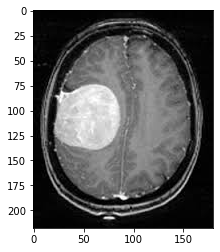


Sample no image:


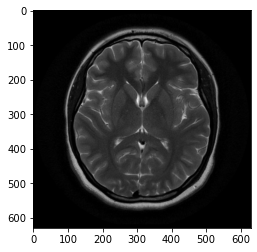

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "C:/Users/k0nv1ct/archive/brain_tumor_dataset"
yes_dir = os.path.join(base_dir, "yes/")
no_dir = os.path.join(base_dir, "no/")

print("Sample yes image:")
plt.imshow(load_img(f"{os.path.join(yes_dir, os.listdir(yes_dir)[0])}"))
plt.show()

print("\nSample no image:")
plt.imshow(load_img(f"{os.path.join(no_dir, os.listdir(no_dir)[0])}"))
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(yes_dir, os.listdir(yes_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (218, 180, 3)
The maximum pixel value used is: 255.0


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
            
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
   
    train_datagen = ImageDataGenerator(rescale=1/255)

    
    train_generator = train_datagen.flow_from_directory(directory="C:/Users/k0nv1ct/archive/brain_tumor_dataset",
                                                        target_size=(150,150),
                                                        batch_size=10,
                                                        class_mode="binary")
    

    return train_generator

In [ ]:
# Save your generator in a variable
gen = image_generator()

Found 253 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import optimizers, losses


def train_yes_no_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

   

    # Define the model
    model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
         tf.keras.layers.MaxPooling2D(2,2),
         tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
         tf.keras.layers.MaxPooling2D(2,2),
         tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
         tf.keras.layers.MaxPooling2D(2,2),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(512,activation="relu"),
         tf.keras.layers.Dense(1,activation="sigmoid"),
        
    ])

    
    model.compile(loss="binary_crossentropy",
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    


    
    history = model.fit(x=train_generator,
                        epochs=20,
                        callbacks=[callbacks]
                       ) 
    
    
    return history

In [ ]:
hist = train_yes_no_model(gen)

Epoch 1/20
26/26 [==============================] - 3s 84ms/step - loss: 0.7709 - accuracy: 0.6482
Epoch 2/20
26/26 [==============================] - 2s 84ms/step - loss: 0.4900 - accuracy: 0.7945
Epoch 3/20
26/26 [==============================] - 2s 84ms/step - loss: 0.4247 - accuracy: 0.8221
Epoch 4/20
26/26 [==============================] - 2s 85ms/step - loss: 0.3225 - accuracy: 0.8498
Epoch 5/20
26/26 [==============================] - 2s 86ms/step - loss: 0.2536 - accuracy: 0.8972
Epoch 6/20
26/26 [==============================] - 2s 86ms/step - loss: 0.1155 - accuracy: 0.9486
Epoch 7/20
26/26 [==============================] - 2s 85ms/step - loss: 0.1117 - accuracy: 0.9644
Epoch 8/20
26/26 [==============================] - 2s 89ms/step - loss: 0.2288 - accuracy: 0.9526
Epoch 9/20
26/26 [==============================] - 2s 84ms/step - loss: 0.0637 - accuracy: 0.9763
Epoch 10/20
26/26 [==============================] - 2s 85ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 11/

In [ ]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 11 epochs


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_cnn.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/k0nv1ct/archive/val',
                                            target_size = (65, 65),
                                            batch_size = 10,
                                            class_mode = 'categorical',color_mode='grayscale')

Found 27 images belonging to 2 classes.


In [ ]:
y_pred = model.predict(test_set)

NameError: ignored

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)